# Notebook to read and display optimization results

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pulp import *
import sys
from utilities import import_excel
import plotly.graph_objects as go
import plotly.express as px
import pickle
from plots import plot_ts_optim, plot_pie_energy, plot_storage, plot_stack_production
import matplotlib.pyplot as plt

Choose country to display

In [5]:
country_name = 'Nepal'


In [6]:
data = pd.read_pickle(f"results/{country_name}/optimization_results.pickle")

In [7]:
optimized_pv = data['optimized_pv']
optimized_wind = data['optimized_wind']
optimized_charge = data['optimized_charge']
optimized_discharge = data['optimized_discharge']
optimized_p_curt = data['optimized_p_curt']
optimized_stock = data['optimized_stock']
optimized_dispatchable = data['optimized_dispatchable']
Load_ts = data['consumption']

E_wind = data['E_wind']/1000000
E_pv = data['E_pv']/1000000
E_dispatch = data['E_dispatch']/1000000
E_curt = data['E_curt']/1000000
E_loss  = data['E_loss']/1000000
E_stock = data['E_stock']/1000000
E_destock = data['E_destock']/1000000

In [8]:
data['mean_consumption']*data['wind_capacity']

7554513.282825435

In [9]:
print(f'Total wind energy: {E_wind} TWh' )
print(f'Total solar energy: {E_pv} TWh' )
print(f'Total dispatchable energy: {E_dispatch} TWh' )
print(f'Total stored energy: {E_stock} TWh' )
print(f'Total energy supplied by storage: {E_destock} TWh' )
print(f'Total lost energy: {E_loss} TWh' )
print(f'Total curtailed energy: {E_curt} TWh' )

Total wind energy: 0.8112642897787288 TWh
Total solar energy: 4.44874771022127 TWh
Total dispatchable energy: 1.149249628452636 TWh
Total stored energy: 2.0277158033755396 TWh
Total energy supplied by storage: 1.6221726427004315 TWh
Total lost energy: 0.4055431606751079 TWh
Total curtailed energy: 0.743706467777527 TWh


In [10]:
colors_dict = {
    'Wind': 'steelblue',        
    'PV': 'gold',
    'Discharge': 'orangered',    
    'SOC': 'darkgreen',           
    'Charge': 'purple',
    'Consumption': 'green',          
    'Dispatchable': 'crimson',       
    'Curtailment': 'cyan'    
}

In [11]:
plot_ts_optim([optimized_pv, optimized_wind, optimized_dispatchable, optimized_p_curt,np.array(Load_ts) ], ['PV', 'Wind', 'Dispatchable', 'Curtailment', 'Consumption'], country_name, colors_dict = colors_dict, savefig=False)

In [12]:
plot_storage(optimized_charge, optimized_discharge, optimized_stock, country_name, colors_dict = colors_dict, savefig=True)

In [13]:
plot_stack_production(optimized_pv, optimized_wind, optimized_dispatchable, country_name, colors_dict = colors_dict)

In [14]:
plot_pie_energy([E_wind, E_pv, E_dispatch],  country_name, names = ['Wind', 'PV', 'Dispatchable'],colors_dict = colors_dict, savefig=False)

In [15]:

fig = go.Figure(data=[
    go.Bar(name='Renewables', x=[country_name], y=[E_wind+E_pv]),
    go.Bar(name='From stock', x=[country_name], y=[E_destock]),
    go.Bar(name='Dispatchable', x=[country_name], y=[E_dispatch]),
    go.Bar(name='Curtailment', x=[country_name], y=[-E_curt]),
    go.Bar(name='Loss', x=[country_name], y=[-E_loss])
])

fig.update_layout(
    title='Energy production',
    barmode='relative',
    yaxis_title = 'TWh'
)

fig.show()

### Save indepedent files for time series

In [245]:
test_df = pd.DataFrame(optimized_stock)*54
test_df.to_excel(f'../input_time_series/{country_name}/test_wavelet_soc.xlsx', index = False)

In [246]:
test_df = pd.DataFrame(optimized_pv)*54
test_df.to_excel(f'../input_time_series/{country_name}/test_wavelet_pv.xlsx', index = False)

In [247]:
test_df = pd.DataFrame(optimized_wind)*54
test_df.to_excel(f'../input_time_series/{country_name}/test_wavelet_wind.xlsx', index = False)

In [248]:
test_df = pd.DataFrame(optimized_dispatchable)*54
test_df.to_excel(f'../input_time_series/{country_name}/test_wavelet_dispatchable.xlsx', index = False)

In [83]:
residual_demand = pd.DataFrame(Load_ts)-pd.DataFrame(optimized_wind)-pd.DataFrame(optimized_pv)

In [84]:
residual_demand.to_excel(f'../input_time_series/{country_name}/test_wavelet_residual.xlsx', index = False)

In [23]:
pd.options.plotting.backend = "plotly"
fig = residual_demand.plot(title = 'Residual demand (consumption - intermittent production)', labels =dict(index="Hours", value = 'Power normalized to 1 MW'))
fig.show()

<Axes: >

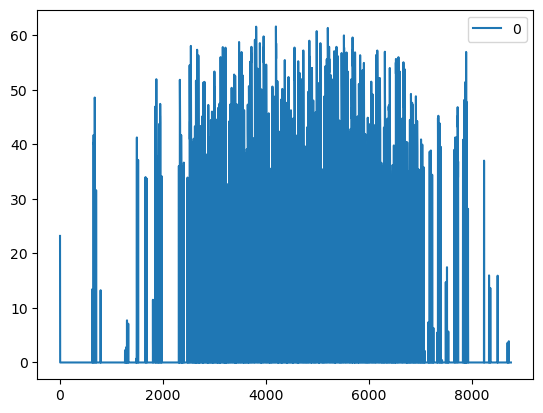

In [31]:
test_df.plot()